# 생산량 데이터 전처리

!pip install natsort
!pip install pandas
!pip install openpyxl

In [127]:
# 라이브러리
from glob import glob
import natsort
import pandas as pd

### 1980~2023 연도별 생산량

In [19]:
path = ('./data/Year/')
file = glob(f'{path}*.xlsx')
file_list = natsort.natsorted(file) #이름순 정렬
file_list

['./data/Year\\naqs20230630174038394.xlsx',
 './data/Year\\naqs20230630174110731.xlsx',
 './data/Year\\naqs20230630174144126.xlsx',
 './data/Year\\naqs20230630174201309.xlsx',
 './data/Year\\naqs20230630174416449.xlsx',
 './data/Year\\naqs20230630174433044.xlsx',
 './data/Year\\naqs20230630174502757.xlsx',
 './data/Year\\naqs20230630174522145.xlsx',
 './data/Year\\naqs20230630174629783.xlsx',
 './data/Year\\naqs20230630174653992.xlsx',
 './data/Year\\naqs20230630174717334.xlsx',
 './data/Year\\naqs20230630174734634.xlsx',
 './data/Year\\naqs20230630174749893.xlsx',
 './data/Year\\naqs20230630174805060.xlsx',
 './data/Year\\naqs20230630174823640.xlsx',
 './data/Year\\naqs20230630174840413.xlsx',
 './data/Year\\naqs20230630175026405.xlsx',
 './data/Year\\naqs20230630175045188.xlsx',
 './data/Year\\naqs20230630175100436.xlsx',
 './data/Year\\naqs20230630175130900.xlsx',
 './data/Year\\naqs20230630175146839.xlsx',
 './data/Year\\naqs20230630175202140.xlsx',
 './data/Year\\naqs2023063017522

In [20]:
def merge_columns(file_single):
    df = pd.read_excel(file_single, sheet_name='생산정보(통계청)(스프레드시트)')
    df.columns = df.columns.str.replace('/', '_')
    # 멀티컬럼 병합
    for col in df.columns:
        if col.startswith('Unnamed'):
            col_index = df.columns.get_loc(col)
            prev_col = df.columns[col_index - 1]
            df.rename(columns={col: prev_col}, inplace=True)
    df.columns = (df.columns[1:]+'_'+df.iloc[0].values[1:]).insert(0, '조회일자')
    return df


In [115]:
df_year = merge_columns(file_list[0])
df_year = df_year.drop(0)
for file_ in file_list[1:]:
    df_temp = merge_columns(file_)
    df_year = pd.merge(df_year, df_temp, on='조회일자', how='outer')
df_year = df_year.drop(39).reset_index(drop=True) #오류 행 제거
df_year = df_year.fillna(0)

c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\openpyxl\styles\styleshee

In [156]:
df_year.to_csv('data/Yearly_Production.csv', index=False)

In [118]:
df_year

,조회일자,전국_가을감자_재배면적,전국_가을감자_생산량,전국_가을감자_단수,서울_가을감자_재배면적,서울_가을감자_생산량,서울_가을감자_단수,세종_가을감자_재배면적,세종_가을감자_생산량,세종_가을감자_단수,...,울산_풋고추_단수,제주특별자치도_풋고추_재배면적,제주특별자치도_풋고추_생산량,제주특별자치도_풋고추_단수,대구_풋고추_재배면적,대구_풋고추_생산량,대구_풋고추_단수,경상북도_풋고추_재배면적,경상북도_풋고추_생산량,경상북도_풋고추_단수
0,1980.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1981.0,"2,935","34,380","1,171",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1982.0,"2,538","32,631","1,286",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1983.0,"1,772","22,246","1,255",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1984.0,"1,507","20,472","1,358",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1985.0,"1,808","23,640","1,308",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1986.0,"1,492","20,048","1,344",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1987.0,"1,287","19,294","1,499",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1988.0,"1,852","28,815","1,556",0,0,0,0,0,0,...,0,2,26,"1,300",3,44,"1,464",72,"1,054","1,464"
9,1989.0,"3,281","55,274","1,685",0,0,0,0,0,0,...,0,0,0,0,0,0,0,68,"1,164","1,712"


In [119]:
# 재배면적, 생산량, 단수 중 선택 
target_ = '생산량'
col_production = df_year.columns[df_year.columns.str.contains(target_)]
df_year[col_production.insert(0,'조회일자')]

,조회일자,전국_가을감자_생산량,서울_가을감자_생산량,세종_가을감자_생산량,강원도_가을감자_생산량,대전_가을감자_생산량,충청남도_가을감자_생산량,충청북도_가을감자_생산량,인천_가을감자_생산량,경기도_가을감자_생산량,...,경기도_풋고추_생산량,광주_풋고추_생산량,전라남도_풋고추_생산량,전라북도_풋고추_생산량,부산_풋고추_생산량,경상남도_풋고추_생산량,울산_풋고추_생산량,제주특별자치도_풋고추_생산량,대구_풋고추_생산량,경상북도_풋고추_생산량
0,1980.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1981.0,"34,380",0,0,450,0,"5,145","3,380",0,645,...,0,0,0,0,0,0,0,0,0,0
2,1982.0,"32,631",0,0,147,0,"3,045","1,272",0,431,...,0,0,0,0,0,0,0,0,0,0
3,1983.0,"22,246",0,0,253,0,"1,643",436,0,832,...,0,0,0,0,0,0,0,0,0,0
4,1984.0,"20,472",0,0,60,0,"1,383",243,0,150,...,0,0,0,0,0,0,0,0,0,0
5,1985.0,"23,640",0,0,829,0,846,312,0,293,...,0,0,0,0,0,0,0,0,0,0
6,1986.0,"20,048",0,0,39,0,"1,003",49,0,393,...,0,0,0,0,0,0,0,0,0,0
7,1987.0,"19,294",0,0,101,0,498,641,0,275,...,0,0,0,0,0,0,0,0,0,0
8,1988.0,"28,815",0,0,108,0,562,503,0,434,...,"2,420","4,574","6,125",165,16,"18,896",0,26,44,"1,054"
9,1989.0,"55,274",0,0,48,0,728,230,0,275,...,"1,683","3,841","6,008",508,40,"19,850",0,0,0,"1,164"


### 2020~2022 월별 생산량

In [140]:
path = ('./data/Month/')
file = glob(f'{path}*.csv')
file_list = natsort.natsorted(file) #이름순 정렬
file_list

['./data/Month\\TB_MI_PDTN-210218_001.csv',
 './data/Month\\TB_MI_PDTN-210531_001.csv',
 './data/Month\\TB_MI_PDTN-211007_001.csv',
 './data/Month\\TB_MI_PDTN-211130.csv',
 './data/Month\\TB_MI_PDTN-211231.csv',
 './data/Month\\TB_MI_PDTN-220531.csv',
 './data/Month\\TB_MI_PDTN-221012.csv',
 './data/Month\\TB_MI_PDTN-221114.csv',
 './data/Month\\TB_MI_PDTN-221220.csv']

In [153]:
df_month = pd.read_csv(file_list[0], encoding='cp949')
for file in file_list[1:]:
    df_temp = pd.read_csv(file, encoding='cp949')
    df_month = pd.concat([df_month, df_temp], axis = 0)
df_month = df_month.reset_index(drop=True)

In [154]:
df_month['BASE_YR'].value_counts()

BASE_YR
2020    1457
2021    1356
2022    1214
Name: count, dtype: int64

In [157]:
df_month.to_csv('data/Monthly_Production.csv', index=False)

In [166]:
df_month

,BASE_YR,BASE_MM,AGFD_PDLT_NM,PDTN_QY
0,2020,1,가지,393028
1,2020,1,감,259908
2,2020,1,감귤,375517
3,2020,1,감자,786997
4,2020,1,갓,743
...,...,...,...,...
4022,2022,11,풋옥수수,30180
4023,2022,11,피망,4957
4024,2022,11,호박,999565
4025,2022,11,홍갓,28838


# 생산면적 데이터 전처리

!pip install geopandas
!pip install matplotlib

In [33]:
import gc
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
file_path = glob.glob("./data/shp./*.zip")[0]
gdf = gpd.GeoDataFrame.from_file(file_path, encoding='CP949')

In [12]:
# 경위도 좌표계 설정
gdf = gdf.to_crs({"init": "epsg:4326"})

c:\Users\LEE\anaconda3\envs\AWS_\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [41]:
gdf.head()

,ID,UID,FL_NM,FL_CD,STDG_CD,STDG_ADDR,PNU,LDCG_CD,SB_PNU,SB_LDCG_CD,...,FLIGHT_YMD,UPDT_YMD,UPDT_TP_NM,UPDT_TP_CD,CAUSE_NM,CAUSE_CD,L3_YN,O_UID,O_FL_NM,geometry
0,451303102200156,08277295,밭,02,4617039029,전라남도 나주시 금천면 촌곡리,4617039029100400023,과,4617039029100400023,과,...,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08277295,밭,"POLYGON ((126.77312 35.94006, 126.77309 35.940..."
1,451303102200157,08284847,밭,02,4617039029,전라남도 나주시 금천면 촌곡리,4617039029100400023,과,4617039029100400023,과,...,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08284847,밭,"POLYGON ((126.77307 35.93994, 126.77303 35.939..."
2,451303102200199,08284836,밭,02,4617039029,전라남도 나주시 금천면 촌곡리,4617039029100400023,과,4617039029100400023,과,...,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08284836,밭,"POLYGON ((126.77286 35.93982, 126.77303 35.939..."
3,292001640000744,06688003,밭,02,4617038033,전라남도 나주시 노안면 양천리,4617038033106680010,전,4617038033106680010,전,...,2019-01-01,NaN,NaN,NaN,NaN,NaN,N,06688003,밭,"POLYGON ((126.68098 35.10749, 126.68095 35.107..."
4,292001550000857,06677084,밭,02,4617038025,전라남도 나주시 노안면 유곡리,4617038025200270003,구,2920015500111190000,임,...,2019-01-01,NaN,NaN,NaN,NaN,NaN,N,06677084,밭,"POLYGON ((126.73777 35.10772, 126.73762 35.107..."


In [14]:
# CSV로 저장할 파일명
new_file_name = "jeonnam_area.csv"

# GeoDataFrame을 CSV 파일로 저장
gdf.to_csv(f"./data/{new_file_name}", encoding='utf-8', index=False)

df_jeonnam = pd.read_csv(f'./data/{new_file_name}')

In [55]:
df_jeonnam.iloc[:,14:]

,FLIGHT_YMD,UPDT_YMD,UPDT_TP_NM,UPDT_TP_CD,CAUSE_NM,CAUSE_CD,L3_YN,O_UID,O_FL_NM,geometry
0,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08277295,밭,POLYGON ((126.77311983622907 35.94006055756389...
1,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08284847,밭,POLYGON ((126.77306568052624 35.93994002455839...
2,2020-05-01,2021-12-30,NaN,NaN,NaN,NaN,N,08284836,밭,POLYGON ((126.77286303996219 35.93981864532982...
3,2019-01-01,NaN,NaN,NaN,NaN,NaN,N,06688003,밭,POLYGON ((126.68097645024304 35.10748576113174...
4,2019-01-01,NaN,NaN,NaN,NaN,NaN,N,06677084,밭,POLYGON ((126.73776909337568 35.10771887455933...
...,...,...,...,...,...,...,...,...,...,...
1739505,2019-01-01,NaN,NaN,NaN,NaN,NaN,Y,08094533,논,POLYGON ((126.97029756516446 34.98246268630417...
1739506,2021-03-01,2022-12-30,변경,3.0,해당무,99.0,NaN,07503603,밭,POLYGON ((126.68095927765101 34.89280648979317...
1739507,2021-03-01,2022-12-30,변경,3.0,해당무,99.0,N,07503603,밭,POLYGON ((126.68095927765101 34.89280648979317...
1739508,2021-05-01,2022-12-30,변경,3.0,해당무,99.0,N,07534615,밭,POLYGON ((126.64413436251114 34.37585877547075...


<Axes: >

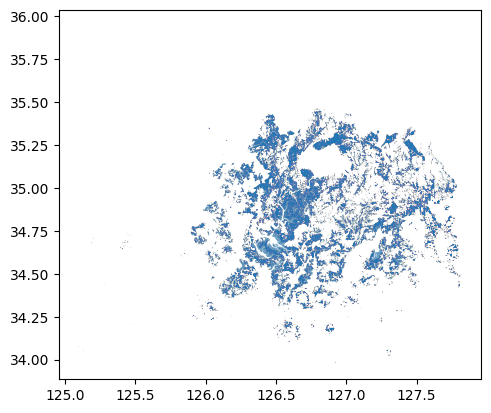

In [34]:
# 전남 시각화
gdf.plot()